In [1]:
# Зависимости
import numpy
import pandas
import matplotlib
import matplotlib.pyplot
import sklearn
from sklearn import cluster
from sklearn import datasets

In [2]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

In [4]:
x = pandas.DataFrame(test_x)
x

,0,1
0,-1.603697,-1.091621
1,-0.753314,-3.541566
2,-7.268395,-5.672456
3,-1.999883,-0.962898
4,-2.641521,-1.727254
...,...,...
4995,-3.032272,-2.933244
4996,-1.724323,-2.175596
4997,-8.026873,-6.596482
4998,-8.672857,-6.137468


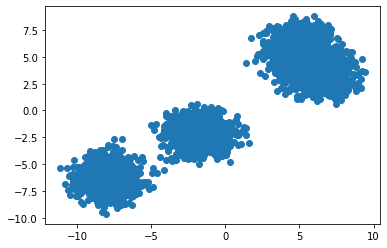

In [5]:
# Отобразим полученный набор данных в виде точек на плоскости
matplotlib.pyplot.scatter(x[0], x[1])
matplotlib.pyplot.show()

In [6]:
# Теперь запустим алгоритм k-средних, указав число кластеров, которое нам изначально известно
kmeans = sklearn.cluster.KMeans(n_clusters = 4)
y = kmeans.fit_predict(x)

In [7]:
# Выведем значение инерции (именно оно минимизируется при использовании алгоритма k-средних)
print(kmeans.inertia_)

9363.870628835797


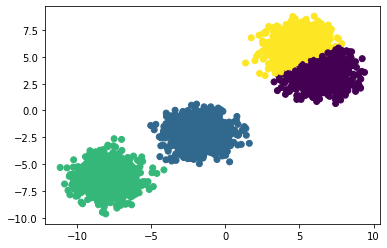

In [8]:
# Отобразим набор данных, используя разные цвета для разных кластеров
matplotlib.pyplot.scatter(x[0], x[1], c = y)
matplotlib.pyplot.show()